#### 21. 读取本地Excel数据

In [1]:
import pandas as pd
df = pd.read_excel('./data/pandas120.xlsx')
df

,createTime,education,salary
0,2020-03-16 11:30:18,本科,20k-35k
1,2020-03-16 10:58:48,本科,20k-40k
2,2020-03-16 10:46:39,不限,20k-35k
3,2020-03-16 10:45:44,本科,13k-20k
4,2020-03-16 10:20:41,本科,10k-20k
...,...,...,...
130,2020-03-16 11:36:07,本科,10k-18k
131,2020-03-16 09:54:47,硕士,25k-50k
132,2020-03-16 10:48:32,本科,20k-40k
133,2020-03-16 10:46:31,本科,15k-23k


#### 22. 查看df数据的前5行

In [2]:
df.head()

,createTime,education,salary
0,2020-03-16 11:30:18,本科,20k-35k
1,2020-03-16 10:58:48,本科,20k-40k
2,2020-03-16 10:46:39,不限,20k-35k
3,2020-03-16 10:45:44,本科,13k-20k
4,2020-03-16 10:20:41,本科,10k-20k


#### 23. 将salary列数据转换为最大值与最小值的平均值

In [3]:
#方法一：apply+自定义函数
def func(df):
    min_max = df['salary'].split('-')
    smin = int(min_max[0].strip('k'))
    smax = int(min_max[1].strip('k'))
    df['salary'] = int((smax + smin) / 2 * 1000)
    return df

df = df.apply(func, axis=1)
df

,createTime,education,salary
0,2020-03-16 11:30:18,本科,27500
1,2020-03-16 10:58:48,本科,30000
2,2020-03-16 10:46:39,不限,27500
3,2020-03-16 10:45:44,本科,16500
4,2020-03-16 10:20:41,本科,15000
...,...,...,...
130,2020-03-16 11:36:07,本科,14000
131,2020-03-16 09:54:47,硕士,37500
132,2020-03-16 10:48:32,本科,30000
133,2020-03-16 10:46:31,本科,19000


In [4]:
#去掉字符串中的非数字字符的其他方法：
#法一：（有问题）
#import re
#re.findall('\d+', df['salary'])

#### 24. 将数据根据学历进行分组并计算平均薪资

In [5]:
df.groupby('education').mean()

,salary
education,
不限,19600.000000
大专,10000.000000
本科,19361.344538
硕士,20642.857143


#### 25. 将createTime列时间转换为月-日

- 注：采用Timestamp.to_pydatetime()函数将给定的时间戳转换为本地python datetime对象; strftime() 用来格式化datetime 对象
    https://vimsky.com/examples/usage/python-pandas-timestamp-to_pydatetime.html ;
    https://blog.csdn.net/shomy_liu/article/details/44141483 ;

In [6]:
for i in range(len(df)):
    df.iloc[i,0] = df.iloc[i,0].to_pydatetime().strftime("%m-%d")
df.head()

,createTime,education,salary
0,03-16,本科,27500
1,03-16,本科,30000
2,03-16,不限,27500
3,03-16,本科,16500
4,03-16,本科,15000


#### 26. 查看索引、数据类型和内存信息

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   createTime  135 non-null    object
 1   education   135 non-null    object
 2   salary      135 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


#### 27. 查看数值型列的汇总统计

In [8]:
df.describe()

,salary
count,135.000000
mean,19159.259259
std,8661.686922
min,3500.000000
25%,14000.000000
50%,17500.000000
75%,25000.000000
max,45000.000000


#### 28. 新增一列根据salary将数据分为三组

- 注：pandas.cut用来把一组数据分割成离散的区间
    - https://www.cnblogs.com/sench/p/10128216.html#:~:text=%E7%94%A8%E9%80%94%20pandas.cut%E7%94%A8%E6%9D%A5%E6%8A%8A%E4%B8%80%E7%BB%84%E6%95%B0%E6%8D%AE%E5%88%86%E5%89%B2%E6%88%90%E7%A6%BB%E6%95%A3%E7%9A%84%E5%8C%BA%E9%97%B4%E3%80%82%E6%AF%94%E5%A6%82%E6%9C%89%E4%B8%80%E7%BB%84%E5%B9%B4%E9%BE%84%E6%95%B0%E6%8D%AE%EF%BC%8C%E5%8F%AF%E4%BB%A5%E4%BD%BF%E7%94%A8pandas.cut%E5%B0%86%E5%B9%B4%E9%BE%84%E6%95%B0%E6%8D%AE%E5%88%86%E5%89%B2%E6%88%90%E4%B8%8D%E5%90%8C%E7%9A%84%E5%B9%B4%E9%BE%84%E6%AE%B5%E5%B9%B6%E6%89%93%E4%B8%8A%E6%A0%87%E7%AD%BE%E3%80%82%20%E5%8E%9F%E5%9E%8B%20pandas.cut%28x%2C%20bins%2C,right%3DTrue%2C%20labels%3DNone%2C%20retbins%3DFalse%2C%20precision%3D3%2C%20include_lowest%3DFalse

In [9]:
bins = [0, 5000, 20000, 50000]
group_names = ['低', '中', '高']
df['categories'] = pd.cut(df['salary'], bins, labels=group_names)
df

,createTime,education,salary,categories
0,03-16,本科,27500,高
1,03-16,本科,30000,高
2,03-16,不限,27500,高
3,03-16,本科,16500,中
4,03-16,本科,15000,中
...,...,...,...,...
130,03-16,本科,14000,中
131,03-16,硕士,37500,高
132,03-16,本科,30000,高
133,03-16,本科,19000,中


#### 29. 按照salary列对数据降序排列

In [10]:
df.sort_values('salary', ascending=False)

,createTime,education,salary,categories
53,03-16,本科,45000,高
37,03-16,本科,40000,高
101,03-16,本科,37500,高
16,03-16,本科,37500,高
131,03-16,硕士,37500,高
...,...,...,...,...
123,03-16,本科,4500,低
126,03-16,本科,4000,低
110,03-16,本科,4000,低
96,03-16,不限,3500,低


#### 30. 取出第33行数据

In [11]:
df.loc[32]#df.iloc[32,:]#df.iloc[32]

createTime    03-16
education        硕士
salary        22500
categories        高
Name: 32, dtype: object

#### 31. 计算salary列的中位数

- Pandas 常用统计数据方法汇总:
    https://blog.csdn.net/qq_42067550/article/details/106260512

In [12]:
df['salary'].median()

17500.0

#### 32. 绘制薪资水平频率分布直方图

- python绘制直方图matplotlib.pyplot.hist( ) 方法常用参数详解:
    https://blog.csdn.net/qq_37007384/article/details/102880242

(array([2.14190094e-05, 1.42793396e-05, 6.42570281e-05, 5.53324409e-05,
        2.14190094e-05, 1.42793396e-05, 3.56983490e-05, 5.35475234e-06,
        7.13966979e-06, 1.78491745e-06]),
 array([ 3500.,  7650., 11800., 15950., 20100., 24250., 28400., 32550.,
        36700., 40850., 45000.]),
 <BarContainer object of 10 artists>)

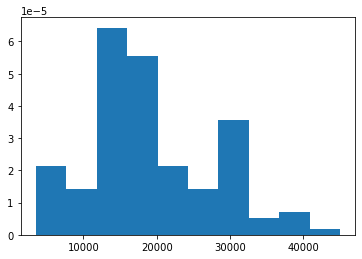

In [13]:
import matplotlib.pyplot as plt
#方法一：
plt.hist(df['salary'], density=True)
#方法二：
#df.salary.plot(kind='hist')

#### 33. 绘制薪资水平密度曲线

<AxesSubplot:ylabel='Density'>

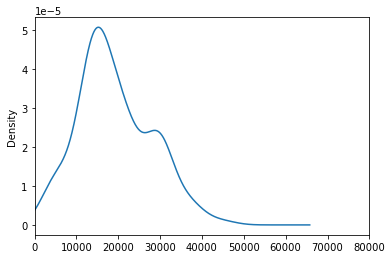

In [14]:
df.salary.plot(kind='kde', xlim=(0, 80000))

#### 34.删除最后一列categories

- pandas删除某一列的方法:
    - https://blog.csdn.net/weixin_30376453/article/details/99357384?utm_term=pandas%E5%88%A0%E9%99%A4%E6%9C%80%E5%90%8E%E4%B8%80%E5%88%97&utm_medium=distribute.pc_aggpage_search_result.none-task-blog-2~all~sobaiduweb~default-0-99357384&spm=3001.4430

In [15]:
#方法一：
#del df['categories']

In [16]:
#方法二：
#df.drop('categories',axis=1, inplace=True) #columns=['xxx']

In [17]:
#方法三：
df.drop([df.columns[df.shape[1]-1]], axis=1,inplace=True)  

#### 35. 将df的第一列与第二列合并为新的一列

In [18]:
df['test'] = df['education'] + df['createTime']
df

,createTime,education,salary,test
0,03-16,本科,27500,本科03-16
1,03-16,本科,30000,本科03-16
2,03-16,不限,27500,不限03-16
3,03-16,本科,16500,本科03-16
4,03-16,本科,15000,本科03-16
...,...,...,...,...
130,03-16,本科,14000,本科03-16
131,03-16,硕士,37500,硕士03-16
132,03-16,本科,30000,本科03-16
133,03-16,本科,19000,本科03-16


#### 36. 将education列与salary列合并为新的一列

In [19]:
df['test1'] = df['salary'].map(str) + df['education']
df

,createTime,education,salary,test,test1
0,03-16,本科,27500,本科03-16,27500本科
1,03-16,本科,30000,本科03-16,30000本科
2,03-16,不限,27500,不限03-16,27500不限
3,03-16,本科,16500,本科03-16,16500本科
4,03-16,本科,15000,本科03-16,15000本科
...,...,...,...,...,...
130,03-16,本科,14000,本科03-16,14000本科
131,03-16,硕士,37500,硕士03-16,37500硕士
132,03-16,本科,30000,本科03-16,30000本科
133,03-16,本科,19000,本科03-16,19000本科


#### 37. 计算salary最大值与最小值之差

- Numpy的数组各行，各列的求和，平均值，最大值，最小值，最大最小值差，标准差，方差等的计算:
    https://blog.csdn.net/qq_18351157/article/details/103890205

In [20]:
#方法一：
df['salary'].max() - df['salary'].min()
#方法二：
df[['salary']].apply(lambda x : x.max() - x.min())
#方法三：
import numpy as np
np.ptp(df['salary'])

41500

#### 38. 将第一行与最后一行拼接

In [21]:
pd.concat([df[:1], df[-2:-1]])

,createTime,education,salary,test,test1
0,03-16,本科,27500,本科03-16,27500本科
133,03-16,本科,19000,本科03-16,19000本科


#### 39. 将第8行数据添加至末尾

In [22]:
df.append(df.iloc[7])

,createTime,education,salary,test,test1
0,03-16,本科,27500,本科03-16,27500本科
1,03-16,本科,30000,本科03-16,30000本科
2,03-16,不限,27500,不限03-16,27500不限
3,03-16,本科,16500,本科03-16,16500本科
4,03-16,本科,15000,本科03-16,15000本科
...,...,...,...,...,...
131,03-16,硕士,37500,硕士03-16,37500硕士
132,03-16,本科,30000,本科03-16,30000本科
133,03-16,本科,19000,本科03-16,19000本科
134,03-16,本科,30000,本科03-16,30000本科


#### 40. 查看每列的数据类型

In [23]:
df.dtypes

createTime    object
education     object
salary         int64
test          object
test1         object
dtype: object

#### 41. 将createTime列设为索引

In [24]:
df.set_index('createTime')

,education,salary,test,test1
createTime,,,,
03-16,本科,27500,本科03-16,27500本科
03-16,本科,30000,本科03-16,30000本科
03-16,不限,27500,不限03-16,27500不限
03-16,本科,16500,本科03-16,16500本科
03-16,本科,15000,本科03-16,15000本科
...,...,...,...,...
03-16,本科,14000,本科03-16,14000本科
03-16,硕士,37500,硕士03-16,37500硕士
03-16,本科,30000,本科03-16,30000本科


#### 42.生成一个和df长度相同的随机数dataframe

In [25]:
df1 = pd.DataFrame(pd.Series(np.random.randint(1, 10, len(df))))
df1

,0
0,2
1,3
2,1
3,2
4,6
...,...
130,8
131,2
132,1
133,2


#### 43. 将上一题生成的dataframe与df合并

In [26]:
df = pd.concat([df,df1], axis=1)
df

,createTime,education,salary,test,test1,0
0,03-16,本科,27500,本科03-16,27500本科,2
1,03-16,本科,30000,本科03-16,30000本科,3
2,03-16,不限,27500,不限03-16,27500不限,1
3,03-16,本科,16500,本科03-16,16500本科,2
4,03-16,本科,15000,本科03-16,15000本科,6
...,...,...,...,...,...,...
130,03-16,本科,14000,本科03-16,14000本科,8
131,03-16,硕士,37500,硕士03-16,37500硕士,2
132,03-16,本科,30000,本科03-16,30000本科,1
133,03-16,本科,19000,本科03-16,19000本科,2


#### 44. 生成新的一列new为salary列减去之前生成随机数列

In [27]:
df['new'] = df['salary'] - df[0]
df

,createTime,education,salary,test,test1,0,new
0,03-16,本科,27500,本科03-16,27500本科,2,27498
1,03-16,本科,30000,本科03-16,30000本科,3,29997
2,03-16,不限,27500,不限03-16,27500不限,1,27499
3,03-16,本科,16500,本科03-16,16500本科,2,16498
4,03-16,本科,15000,本科03-16,15000本科,6,14994
...,...,...,...,...,...,...,...
130,03-16,本科,14000,本科03-16,14000本科,8,13992
131,03-16,硕士,37500,硕士03-16,37500硕士,2,37498
132,03-16,本科,30000,本科03-16,30000本科,1,29999
133,03-16,本科,19000,本科03-16,19000本科,2,18998


#### 45. 检查数据中是否含有任何缺失值

In [28]:
df.isnull().values.any()

False

### 小作业

#### 46. 将salary列类型转换为浮点数

-  数据类型转换：
    https://www.cnblogs.com/onemorepoint/p/9404753.html

In [29]:
df['salary'] = df['salary'].astype('float')
df

,createTime,education,salary,test,test1,0,new
0,03-16,本科,27500.0,本科03-16,27500本科,2,27498
1,03-16,本科,30000.0,本科03-16,30000本科,3,29997
2,03-16,不限,27500.0,不限03-16,27500不限,1,27499
3,03-16,本科,16500.0,本科03-16,16500本科,2,16498
4,03-16,本科,15000.0,本科03-16,15000本科,6,14994
...,...,...,...,...,...,...,...
130,03-16,本科,14000.0,本科03-16,14000本科,8,13992
131,03-16,硕士,37500.0,硕士03-16,37500硕士,2,37498
132,03-16,本科,30000.0,本科03-16,30000本科,1,29999
133,03-16,本科,19000.0,本科03-16,19000本科,2,18998


#### 47. 计算salary大于10000的次数

In [30]:
df[df['salary'] > 10000]['salary'].count()

119

#### 48. 查看每种学历出现的次数

In [31]:
df['education'].value_counts()

本科    119
硕士      7
不限      5
大专      4
Name: education, dtype: int64

#### 49. 查看education列共有几种学历

In [32]:
#方法一：
len(df['education'].unique())
#方差二：
#len(df.groupby('education'))

4

#### 50. 提取salary与new列的和大于60000的最后三行

In [33]:
df2 = df[(df['salary'] + df['new']) > 60000]
df2[-3:]

,createTime,education,salary,test,test1,0,new
92,03-16,本科,35000.0,本科03-16,35000本科,2,34998
101,03-16,本科,37500.0,本科03-16,37500本科,7,37493
131,03-16,硕士,37500.0,硕士03-16,37500硕士,2,37498
